In [112]:
pd.set_option('display.max_columns', 500)
pd.set_option('display.max_rows', 500)

In [547]:
import pandas as pd
import numpy as np

In [511]:
train = pd.read_csv('C:/Users/GD/Downloads/ML-Hackathon-master/ML-Hackathon-master/Genpact_ML_Hackathon_Dec_2018/train_GzS76OK/train.csv')
center = pd.read_csv('C:/Users/GD/Downloads/ML-Hackathon-master/ML-Hackathon-master/Genpact_ML_Hackathon_Dec_2018/train_GzS76OK/fulfilment_center_info.csv')
meal = pd.read_csv('C:/Users/GD/Downloads/ML-Hackathon-master/ML-Hackathon-master/Genpact_ML_Hackathon_Dec_2018/train_GzS76OK/meal_info.csv')
test = pd.read_csv('C:/Users/GD/Downloads/ML-Hackathon-master/ML-Hackathon-master/Genpact_ML_Hackathon_Dec_2018/test.csv')
sub = pd.read_csv('C:/Users/GD/Downloads/ML-Hackathon-master/ML-Hackathon-master/Genpact_ML_Hackathon_Dec_2018/sub.csv')

In [512]:
train = pd.merge(train, meal, on='meal_id' )
train= pd.merge(train, center, on='center_id')

test = pd.merge(test, meal, on='meal_id' )
test= pd.merge(test, center, on='center_id')
# train.head()

In [513]:
train.head()

,id,week,center_id,meal_id,checkout_price,base_price,emailer_for_promotion,homepage_featured,num_orders,category,cuisine,city_code,region_code,center_type,op_area
0,1379560,1,55,1885,136.830000,152.290000,0,0,177,Beverages,Thai,647,56,TYPE_C,2.000000
1,1018704,2,55,1885,135.830000,152.290000,0,0,323,Beverages,Thai,647,56,TYPE_C,2.000000
2,1196273,3,55,1885,132.920000,133.920000,0,0,96,Beverages,Thai,647,56,TYPE_C,2.000000
3,1116527,4,55,1885,135.860000,134.860000,0,0,163,Beverages,Thai,647,56,TYPE_C,2.000000
4,1343872,5,55,1885,146.500000,147.500000,0,0,215,Beverages,Thai,647,56,TYPE_C,2.000000


In [514]:
train = train.drop(train[train.num_orders > 15000].index)

In [515]:
train = train.drop(train[(train.checkout_price > 800) | (train.checkout_price < 20)].index)

In [541]:
test.head()

,id,week,center_id,meal_id,checkout_price,base_price,emailer_for_promotion,homepage_featured,category,cuisine,city_code,region_code,center_type,op_area,Month,Year,Quarter,weekly_mean_price,monthly_mean_price,quarterly_mean_price
0,1028232,146,55,1885,158.110000,159.110000,0,0,Beverages,Thai,647,56,TYPE_C,2.000000,36,2,11,nan,341.114244,341.526555
1,1262649,147,55,1885,159.110000,159.110000,0,0,Beverages,Thai,647,56,TYPE_C,2.000000,36,2,11,nan,341.114244,341.526555
2,1453211,149,55,1885,157.140000,158.140000,0,0,Beverages,Thai,647,56,TYPE_C,2.000000,37,2,11,nan,nan,341.526555
3,1262599,150,55,1885,159.140000,157.140000,0,0,Beverages,Thai,647,56,TYPE_C,2.000000,37,2,11,nan,nan,341.526555
4,1495848,151,55,1885,160.110000,159.110000,0,0,Beverages,Thai,647,56,TYPE_C,2.000000,37,2,11,nan,nan,341.526555


In [540]:
def freq_encode(train_data, test_data, columns):
    '''Returns a DataFrame with encoded columns'''
    encoded_cols = []
    nsamples = train_data.shape[0]
    for col in columns:    
        freqs_cat = train_data.groupby(col)[col].count()/nsamples
        encoded_col_train = train_data[col].map(freqs_cat)
        encoded_col_test = test_data[col].map(freqs_cat)
        encoded_col = pd.concat([encoded_col_train, encoded_col_test], axis=0)
        encoded_col[encoded_col.isnull()] = 0
        encoded_cols.append(pd.DataFrame({'freq_'+col:encoded_col}))
    all_encoded = pd.concat(encoded_cols, axis=1)
    return (all_encoded.loc[train_data.index,:], 
            all_encoded.loc[test_data.index,:])

In [542]:
freq_encode(train, test, ['category','cuisine'])

(        freq_category  freq_cuisine
 0            0.280124      0.258937
 0            0.280124      0.258937
 1            0.280124      0.258937
 1            0.280124      0.258937
 2            0.280124      0.258937
 2            0.280124      0.258937
 3            0.280124      0.258937
 3            0.280124      0.258937
 4            0.280124      0.258937
 4            0.280124      0.258937
 5            0.280124      0.258937
 5            0.280124      0.258937
 6            0.280124      0.258937
 6            0.280124      0.258937
 7            0.280124      0.258937
 7            0.280124      0.258937
 8            0.280124      0.258937
 8            0.280124      0.258937
 9            0.280124      0.258937
 9            0.280124      0.258937
 10           0.280124      0.258937
 10           0.280124      0.258937
 11           0.280124      0.258937
 11           0.280124      0.258937
 12           0.280124      0.258937
 12           0.280124      0.258937
 

In [522]:
train[train.week.isin(test.week)]

,id,week,center_id,meal_id,checkout_price,base_price,emailer_for_promotion,homepage_featured,num_orders,category,cuisine,city_code,region_code,center_type,op_area,Month,Year,Quarter,weekly_mean_price,monthly_mean_price,quarterly_mean_price


In [323]:
train.corr().style.background_gradient(cmap='coolwarm')

,id,week,center_id,meal_id,checkout_price,base_price,emailer_for_promotion,homepage_featured,num_orders,city_code,region_code,op_area
id,1,0.00222518,0.00264136,0.000488442,0.00194121,0.00290944,0.00200102,0.00311078,0.000702059,-0.000386662,-0.000648119,-8.97742e-05
week,0.00222518,1,-0.00344985,0.0198144,0.0265815,0.0286136,-0.000841236,-0.00826304,-0.0172099,0.000404659,0.00459951,0.00154959
center_id,0.00264136,-0.00344985,1,0.00989307,0.00134774,0.000604418,0.013658,-0.00504276,-0.0530347,0.0610778,-0.0034263,-0.111869
meal_id,0.000488442,0.0198144,0.00989307,1,0.0107478,0.00260514,0.0134019,0.0163544,0.0105967,-0.00319773,-0.00166196,-0.00154627
checkout_price,0.00194121,0.0265815,0.00134774,0.0107478,1,0.953389,0.00481768,-0.0571845,-0.282108,-0.00480478,-0.00364838,0.0215693
base_price,0.00290944,0.0286136,0.000604418,0.00260514,0.953389,1,0.171173,0.0571564,-0.222306,-0.00205412,-0.00193448,0.0180312
emailer_for_promotion,0.00200102,-0.000841236,0.013658,0.0134019,0.00481768,0.171173,1,0.390534,0.277147,-0.00523381,-0.00746169,-0.0194623
homepage_featured,0.00311078,-0.00826304,-0.00504276,0.0163544,-0.0571845,0.0571564,0.390534,1,0.29449,0.00864046,0.00360543,0.0414983
num_orders,0.000702059,-0.0172099,-0.0530347,0.0105967,-0.282108,-0.222306,0.277147,0.29449,1,0.041596,0.0297441,0.176976
city_code,-0.000386662,0.000404659,0.0610778,-0.00319773,-0.00480478,-0.00205412,-0.00523381,0.00864046,0.041596,1,0.0426857,0.131476


In [510]:
import eli5
from eli5.sklearn import PermutationImportance

my_model = RandomForestRegressor(random_state=0).fit(X_train, y_train)

perm = PermutationImportance(my_model, random_state=1).fit(X_test, y_test)
eli5.show_weights(perm, feature_names = X_test.columns.tolist(), top=None)

C:\Users\GD\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


Weight,Feature
0.6413 ± 0.0107,mealid_order_avg
0.1872 ± 0.0153,centreid_order_avg
0.1288 ± 0.0136,emailer_for_promotion
0.0952 ± 0.0027,centerid_order_sum
0.0929 ± 0.0060,homepage_featured
0.0813 ± 0.0024,Discount
0.0675 ± 0.0023,mealid_order_sum
0.0519 ± 0.0051,checkout_pricemeal_amount_max
0.0465 ± 0.0022,checkout_price
0.0336 ± 0.0014,checkout_priceres_mem_amount_std


In [293]:
test.shape

(32573, 14)

In [312]:
train = pd.concat([train, test])

C:\Users\GD\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  """Entry point for launching an IPython kernel.


In [367]:
train.head(10)

,id,week,center_id,meal_id,checkout_price,base_price,emailer_for_promotion,homepage_featured,num_orders,category,cuisine,city_code,region_code,center_type,op_area,over_2000_weekly,over_4000_weekly,over_5000_weekly
0,1379560,1,55,1885,136.830000,152.290000,0,0,177,Beverages,Thai,647,56,TYPE_C,2.000000,16.000000,0.000000,nan
1,1018704,2,55,1885,135.830000,152.290000,0,0,323,Beverages,Thai,647,56,TYPE_C,2.000000,8.000000,0.000000,nan
2,1196273,3,55,1885,132.920000,133.920000,0,0,96,Beverages,Thai,647,56,TYPE_C,2.000000,7.000000,0.000000,nan
3,1116527,4,55,1885,135.860000,134.860000,0,0,163,Beverages,Thai,647,56,TYPE_C,2.000000,9.000000,0.000000,nan
4,1343872,5,55,1885,146.500000,147.500000,0,0,215,Beverages,Thai,647,56,TYPE_C,2.000000,97.000000,60.000000,45.000000
5,1493612,6,55,1885,146.530000,146.530000,0,0,285,Beverages,Thai,647,56,TYPE_C,2.000000,72.000000,33.000000,20.000000
6,1110832,7,55,1885,145.530000,146.530000,0,0,148,Beverages,Thai,647,56,TYPE_C,2.000000,79.000000,38.000000,23.000000
7,1461167,8,55,1885,146.530000,145.530000,0,0,135,Beverages,Thai,647,56,TYPE_C,2.000000,16.000000,1.000000,nan
8,1102364,9,55,1885,134.830000,134.830000,0,0,175,Beverages,Thai,647,56,TYPE_C,2.000000,6.000000,0.000000,nan
9,1018130,10,55,1885,144.560000,143.560000,0,0,175,Beverages,Thai,647,56,TYPE_C,2.000000,17.000000,0.000000,nan


In [517]:
train['Month'] = train['week'].apply(lambda x: int(x / 4))
train['Year'] = train['week'].apply(lambda x: int(x / 52))
train['Quarter'] = train['week'].apply(lambda x: int(x / 13))

test['Month'] = test['week'].apply(lambda x: int(x / 4))
test['Year'] = test['week'].apply(lambda x: int(x / 52))
test['Quarter'] = test['week'].apply(lambda x: int(x / 13))

In [519]:
# Weekly mean chechout price
ww=train.groupby(['week']).checkout_price.mean()
train['weekly_mean_price'] = train.week.map(ww)
test['weekly_mean_price'] = test.week.map(ww)

#Monthly mean chechout price
mm=train.groupby(['Month']).checkout_price.mean()
train['monthly_mean_price'] = train.Month.map(mm)
test['monthly_mean_price'] = test.Month.map(mm)

#Quarter mean chechout price
qq=train.groupby(['Quarter']).checkout_price.mean()
train['quarterly_mean_price'] = train.Quarter.map(qq)
test['quarterly_mean_price'] = test.Quarter.map(qq)

In [532]:
cumulative_sum = train.groupby('week')["num_orders"].cumsum() - train["num_orders"]
cumulative_count = train.groupby('week').cumcount()
train['week' + "_mean_target"] = cumulative_sum/cumulative_count

In [539]:
train.week_mean_target

0               nan
1               nan
2               nan
3               nan
4               nan
5               nan
6               nan
7               nan
8               nan
9               nan
10              nan
11              nan
12              nan
13              nan
14              nan
15              nan
16              nan
17              nan
18              nan
19              nan
20              nan
21              nan
22              nan
23              nan
24              nan
25              nan
26              nan
27              nan
28              nan
29              nan
30              nan
31              nan
32              nan
33              nan
34              nan
35              nan
36              nan
37              nan
38              nan
39              nan
40              nan
41              nan
42              nan
43              nan
44              nan
45              nan
46              nan
47              nan
48              nan
49              nan


In [537]:
train.tail(100)

,id,week,center_id,meal_id,checkout_price,base_price,emailer_for_promotion,homepage_featured,num_orders,category,cuisine,city_code,region_code,center_type,op_area,Month,Year,Quarter,weekly_mean_price,monthly_mean_price,quarterly_mean_price,week_mean_target
456448,1266129,134,61,1571,602.430000,630.530000,0,1,55,Fish,Continental,473,77,TYPE_A,4.500000,33,2,10,337.606372,338.686943,339.498805,292.961538
456449,1348365,135,61,1571,602.430000,629.530000,0,1,40,Fish,Continental,473,77,TYPE_A,4.500000,33,2,10,342.176325,338.686943,339.498805,238.529014
456450,1415034,136,61,1571,600.430000,630.530000,0,1,40,Fish,Continental,473,77,TYPE_A,4.500000,34,2,10,344.696746,339.737916,339.498805,235.269948
456451,1106942,137,61,1571,631.530000,630.530000,0,0,26,Fish,Continental,473,77,TYPE_A,4.500000,34,2,10,338.614630,339.737916,339.498805,219.345626
456452,1115652,138,61,1571,631.530000,630.530000,0,1,150,Fish,Continental,473,77,TYPE_A,4.500000,34,2,10,344.285546,339.737916,339.498805,203.669313
456453,1429190,139,61,1571,484.030000,629.530000,0,1,149,Fish,Continental,473,77,TYPE_A,4.500000,34,2,10,331.366572,339.737916,339.498805,229.383089
456454,1499762,140,61,1571,486.030000,629.530000,0,1,230,Fish,Continental,473,77,TYPE_A,4.500000,35,2,10,336.392530,343.304031,339.498805,240.933934
456455,1026660,141,61,1571,583.030000,629.530000,0,1,108,Fish,Continental,473,77,TYPE_A,4.500000,35,2,10,347.367882,343.304031,339.498805,238.000307
456456,1264483,142,61,1571,581.030000,583.030000,0,0,40,Fish,Continental,473,77,TYPE_A,4.500000,35,2,10,347.298610,343.304031,339.498805,228.547281
456457,1039789,143,61,1571,581.030000,582.030000,0,0,41,Fish,Continental,473,77,TYPE_A,4.500000,35,2,11,342.346188,343.304031,341.526555,230.046927


In [530]:
test.center_type.value_counts()

TYPE_A    18716
TYPE_C     7009
TYPE_B     6848
Name: center_type, dtype: int64

In [528]:
test.isna().sum()

id                           0
week                         0
center_id                    0
meal_id                      0
checkout_price               0
base_price                   0
emailer_for_promotion        0
homepage_featured            0
category                     0
cuisine                      0
city_code                    0
region_code                  0
center_type                  0
op_area                      0
Month                        0
Year                         0
Quarter                      0
weekly_mean_price        32573
monthly_mean_price       26062
quarterly_mean_price         0
dtype: int64

In [526]:
train.week.value_counts(sort=False)

1      2922
2      2896
3      2899
4      2889
5      2858
6      2846
7      2794
8      2786
9      2854
10     2859
11     2863
12     2831
13     2838
14     2830
15     2868
16     2850
17     2888
18     2962
19     2939
20     2924
21     2963
22     2923
23     2960
24     2946
25     2972
26     3014
27     3029
28     3044
29     3026
30     3068
31     3082
32     3065
33     3045
34     3016
35     3004
36     3028
37     2997
38     2998
39     3032
40     3070
41     3105
42     3093
43     3104
44     3116
45     3102
46     3065
47     3055
48     3130
49     3129
50     3117
51     3099
52     3193
53     3196
54     3128
55     3179
56     3084
57     3136
58     3130
59     3143
60     3194
61     3188
62     2890
63     3153
64     3200
65     3223
66     3187
67     3205
68     3219
69     3242
70     3260
71     3242
72     3221
73     3208
74     3228
75     3252
76     3210
77     3189
78     3206
79     3208
80     3260
81     3204
82     3250
83     3261
84  

In [524]:
set(train.week).symmetric_difference(test.week)


{1,
 2,
 3,
 4,
 5,
 6,
 7,
 8,
 9,
 10,
 11,
 12,
 13,
 14,
 15,
 16,
 17,
 18,
 19,
 20,
 21,
 22,
 23,
 24,
 25,
 26,
 27,
 28,
 29,
 30,
 31,
 32,
 33,
 34,
 35,
 36,
 37,
 38,
 39,
 40,
 41,
 42,
 43,
 44,
 45,
 46,
 47,
 48,
 49,
 50,
 51,
 52,
 53,
 54,
 55,
 56,
 57,
 58,
 59,
 60,
 61,
 62,
 63,
 64,
 65,
 66,
 67,
 68,
 69,
 70,
 71,
 72,
 73,
 74,
 75,
 76,
 77,
 78,
 79,
 80,
 81,
 82,
 83,
 84,
 85,
 86,
 87,
 88,
 89,
 90,
 91,
 92,
 93,
 94,
 95,
 96,
 97,
 98,
 99,
 100,
 101,
 102,
 103,
 104,
 105,
 106,
 107,
 108,
 109,
 110,
 111,
 112,
 113,
 114,
 115,
 116,
 117,
 118,
 119,
 120,
 121,
 122,
 123,
 124,
 125,
 126,
 127,
 128,
 129,
 130,
 131,
 132,
 133,
 134,
 135,
 136,
 137,
 138,
 139,
 140,
 141,
 142,
 143,
 144,
 145,
 146,
 147,
 148,
 149,
 150,
 151,
 152,
 153,
 154,
 155}

In [498]:
ord=train[train.num_orders > 2000]
weektwo=ord.groupby(['week']).num_orders.count()
train['over_2000_weekly'] = train.week.map(weektwo)
test['over_2000_weekly'] = train.week.map(weektwo)

gord=train[train.num_orders > 4000]

weekth=gord.groupby(['week']).num_orders.count()
train['over_4000_weekly'] = train.week.map(weekth)
test['over_4000_weekly'] = train.week.map(weekth)

word=train[train.num_orders > 6000]

weekfi=word.groupby(['week']).num_orders.count()
train['over_6000_weekly'] = train.week.map(weekfi)
test['over_6000_weekly'] = train.week.map(weekfi)

train.over_4000_weekly.fillna(0, inplace=True)
train.over_6000_weekly.fillna(0, inplace=True)
test.over_2000_weekly.fillna(0, inplace=True)
train.over_2000_weekly.fillna(0, inplace=True)
test.over_2000_weekly.fillna(0, inplace=True)
test.over_4000_weekly.fillna(0, inplace=True)
test.over_6000_weekly.fillna(0, inplace=True)

In [499]:
mealcount=train.groupby(['meal_id']).num_orders.count()
train['mealid_order_count'] = train.meal_id.map(mealcount)
test['mealid_order_count'] = test.meal_id.map(mealcount)

mealsum=train.groupby(['meal_id']).num_orders.sum()
train['mealid_order_sum'] = train.meal_id.map(mealsum)
test['mealid_order_sum'] = test.meal_id.map(mealsum)

mealavg=train.groupby(['meal_id']).num_orders.mean()
train['mealid_order_avg'] = train.meal_id.map(mealavg)
test['mealid_order_avg'] = test.meal_id.map(mealavg)

centercount=train.groupby(['center_id']).num_orders.count()
train['centerid_order_count'] = train.center_id.map(centercount)
test['centerid_order_count'] = test.center_id.map(centercount)

censum=train.groupby(['center_id']).num_orders.sum()
train['centerid_order_sum'] = train.center_id.map(censum)
test['centerid_order_sum'] = test.center_id.map(censum)

cavg=train.groupby(['center_id']).num_orders.mean()
train['centreid_order_avg'] = train.center_id.map(cavg)
test['centerid_order_avg'] = test.center_id.map(cavg)

In [500]:
test.head()

,id,week,center_id,meal_id,checkout_price,base_price,emailer_for_promotion,homepage_featured,category,cuisine,city_code,region_code,center_type,op_area,Month,Year,Quarter,weekly_mean_price,monthly_mean_price,quarterly_mean_price,over_2000_weekly,over_4000_weekly,over_6000_weekly,mealid_order_count,mealid_order_sum,mealid_order_avg,centerid_order_count,centerid_order_sum,centerid_order_avg
0,1028232,146,55,1885,158.110000,159.110000,0,0,Beverages,Thai,647,56,TYPE_C,2.000000,36,2,11,330.530205,327.229777,326.544512,16.000000,0.000000,0.000000,11092,8346246,752.456365,5146,841246,163.475709
1,1262649,147,55,1885,159.110000,159.110000,0,0,Beverages,Thai,647,56,TYPE_C,2.000000,36,2,11,323.926944,327.229777,326.544512,8.000000,0.000000,0.000000,11092,8346246,752.456365,5146,841246,163.475709
2,1453211,149,55,1885,157.140000,158.140000,0,0,Beverages,Thai,647,56,TYPE_C,2.000000,37,2,11,327.202580,327.229777,326.544512,7.000000,0.000000,0.000000,11092,8346246,752.456365,5146,841246,163.475709
3,1262599,150,55,1885,159.140000,157.140000,0,0,Beverages,Thai,647,56,TYPE_C,2.000000,37,2,11,330.160502,325.799728,326.544512,9.000000,0.000000,0.000000,11092,8346246,752.456365,5146,841246,163.475709
4,1495848,151,55,1885,160.110000,159.110000,0,0,Beverages,Thai,647,56,TYPE_C,2.000000,37,2,11,315.249300,325.799728,326.544512,96.000000,59.000000,33.000000,11092,8346246,752.456365,5146,841246,163.475709


In [501]:
train['Difference'] = train.base_price - train.checkout_price
test['Difference'] = test.base_price - test.checkout_price

train['Discount'] = (train.Difference / train.base_price) * 100
test['Discount'] = (test.Difference / test.base_price) * 100

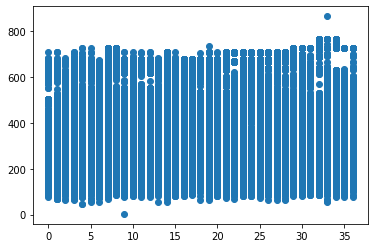

In [250]:
plt.scatter(train.Month,train.checkout_price)

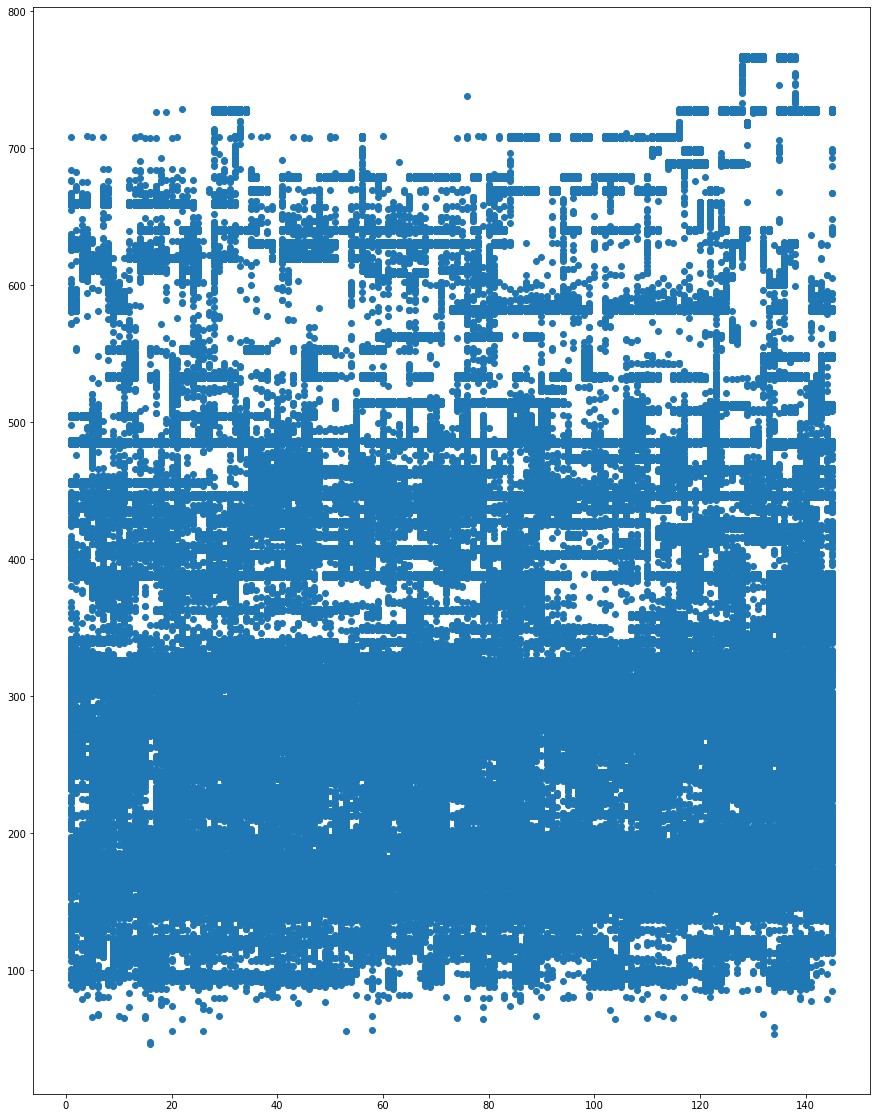

In [336]:
plt.figure(figsize=(15,20))
plt.scatter(train.week,train.checkout_price)

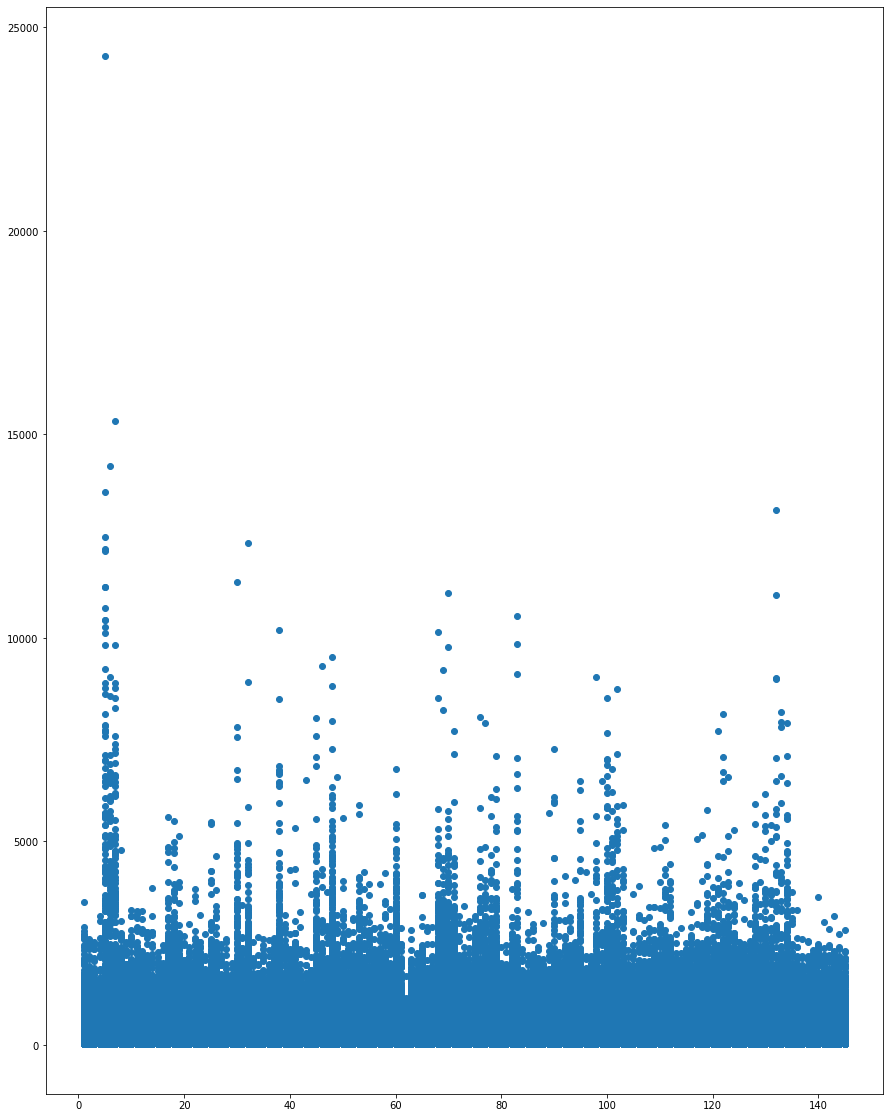

In [337]:
plt.figure(figsize=(15,20))
plt.scatter(train.week,train.num_orders)

In [502]:
order=train.groupby(['center_id']).id.count()
train['center_id_count'] = train.center_id.map(order)
test['center_id_count'] = test.center_id.map(order)

In [503]:
meal=train.groupby(['meal_id']).id.count()
train['meal_id_count'] = train.meal_id.map(meal)
test['meal_id_count'] = test.meal_id.map(meal)

In [504]:
train = train.merge(pd.DataFrame(train.groupby(by=['center_id','meal_id']).id.count()).reset_index(),suffixes=('','res_mem'),on=['center_id','meal_id'],how='left')
train = train.merge(pd.DataFrame(train.groupby(by=['center_id']).id.count()).reset_index(),suffixes=('','_x_res'),on='center_id',how='left')
train = train.merge(pd.DataFrame(train.groupby(by=['center_id','Year','Month']).id.count()).reset_index(),suffixes=('','_res_month'),on=['center_id','Year','Month'],how='left')
train = train.merge(pd.DataFrame(train.groupby(by=['meal_id']).id.count()).reset_index(),suffixes=('','mem'),on=['meal_id'],how='left')
train = train.merge(pd.DataFrame(train.groupby(by=['meal_id','Year']).id.count()).reset_index(),suffixes=('','mem_year'),on=['meal_id','Year'],how='left')

train = train.merge(pd.DataFrame(train.groupby(by=['center_id']).checkout_price.median()).reset_index(),suffixes=('','res_amount_median'),on=['center_id'],how='left')
train = train.merge(pd.DataFrame(train.groupby(by=['center_id']).checkout_price.max()).reset_index(),suffixes=('','res_amount_max'),on=['center_id'],how='left')
train = train.merge(pd.DataFrame(train.groupby(by=['center_id']).checkout_price.min()).reset_index(),suffixes=('','res_amount_min'),on=['center_id'],how='left')
train = train.merge(pd.DataFrame(train.groupby(by=['center_id']).checkout_price.std()).reset_index(),suffixes=('','res_amount_std'),on=['center_id'],how='left')


train = train.merge(pd.DataFrame(train.groupby(by=['center_id','meal_id']).checkout_price.median()).reset_index(),suffixes=('','res_mem_amount_median'),on=['center_id','meal_id'],how='left')
train = train.merge(pd.DataFrame(train.groupby(by=['center_id','meal_id']).checkout_price.max()).reset_index(),suffixes=('','res_mem_amount_max'),on=['center_id','meal_id'],how='left')
train = train.merge(pd.DataFrame(train.groupby(by=['center_id','meal_id']).checkout_price.min()).reset_index(),suffixes=('','res_mem_amount_min'),on=['center_id','meal_id'],how='left')
train = train.merge(pd.DataFrame(train.groupby(by=['center_id','meal_id']).checkout_price.std()).reset_index(),suffixes=('','res_mem_amount_std'),on=['center_id','meal_id'],how='left')

train = train.merge(pd.DataFrame(train.groupby(by=['meal_id']).checkout_price.median()).reset_index(),suffixes=('','meal_amount_median'),on=['meal_id'],how='left')
train = train.merge(pd.DataFrame(train.groupby(by=['meal_id']).checkout_price.max()).reset_index(),suffixes=('','meal_amount_max'),on=['meal_id'],how='left')
train = train.merge(pd.DataFrame(train.groupby(by=['meal_id']).checkout_price.min()).reset_index(),suffixes=('','meal_amount_min'),on=['meal_id'],how='left')
train = train.merge(pd.DataFrame(train.groupby(by=['meal_id']).checkout_price.std()).reset_index(),suffixes=('','meal_amount_std'),on=['meal_id'],how='left')

train = train.merge(pd.DataFrame(train.groupby(by=['city_code','region_code']).checkout_price.median()).reset_index(),suffixes=('','_city_region_median'),on=['city_code','region_code'],how='left')
train = train.merge(pd.DataFrame(train.groupby(by=['city_code','region_code']).checkout_price.max()).reset_index(),suffixes=('','_city_region_max'),on=['city_code','region_code'],how='left')
train = train.merge(pd.DataFrame(train.groupby(by=['city_code','region_code']).checkout_price.min()).reset_index(),suffixes=('','_city_region_min'),on=['city_code','region_code'],how='left')
train = train.merge(pd.DataFrame(train.groupby(by=['city_code','region_code']).checkout_price.std()).reset_index(),suffixes=('','_city_region_std'),on=['city_code','region_code'],how='left')


train = train.merge(pd.DataFrame(train.groupby(by=['center_id','cuisine']).id.count()).reset_index(),suffixes=('','_cuisine_id_count'),on=['center_id','cuisine'],how='left')
train = train.merge(pd.DataFrame(train.groupby(by=['center_id','Month','cuisine']).id.count()).reset_index(),suffixes=('','_cuisine_id_count_monthly'),on=['center_id','Month','cuisine'],how='left')
train = train.merge(pd.DataFrame(train.groupby(by=['center_id','category']).id.count()).reset_index(),suffixes=('','_cat_id_count'),on=['center_id','category'],how='left')
train = train.merge(pd.DataFrame(train.groupby(by=['category','Year','Month']).id.count()).reset_index(),suffixes=('','category_yearmonth'),on=['category','Year','Month'],how='left')
train = train.merge(pd.DataFrame(train.groupby(by=['Year','Month']).id.count()).reset_index(),suffixes=('','id__monthyear'),on=['Year','Month'],how='left')

In [505]:
test = test.merge(pd.DataFrame(test.groupby(by=['center_id','meal_id']).id.count()).reset_index(),suffixes=('','res_mem'),on=['center_id','meal_id'],how='left')
test = test.merge(pd.DataFrame(test.groupby(by=['center_id']).id.count()).reset_index(),suffixes=('','_x_res'),on='center_id',how='left')
test = test.merge(pd.DataFrame(test.groupby(by=['center_id','Year','Month']).id.count()).reset_index(),suffixes=('','_res_month'),on=['center_id','Year','Month'],how='left')
test = test.merge(pd.DataFrame(test.groupby(by=['meal_id']).id.count()).reset_index(),suffixes=('','mem'),on=['meal_id'],how='left')
test = test.merge(pd.DataFrame(test.groupby(by=['meal_id','Year']).id.count()).reset_index(),suffixes=('','mem_year'),on=['meal_id','Year'],how='left')

test = test.merge(pd.DataFrame(test.groupby(by=['center_id']).checkout_price.median()).reset_index(),suffixes=('','res_amount_median'),on=['center_id'],how='left')
test = test.merge(pd.DataFrame(test.groupby(by=['center_id']).checkout_price.max()).reset_index(),suffixes=('','res_amount_max'),on=['center_id'],how='left')
test = test.merge(pd.DataFrame(test.groupby(by=['center_id']).checkout_price.min()).reset_index(),suffixes=('','res_amount_min'),on=['center_id'],how='left')
test = test.merge(pd.DataFrame(test.groupby(by=['center_id']).checkout_price.std()).reset_index(),suffixes=('','res_amount_std'),on=['center_id'],how='left')


test = test.merge(pd.DataFrame(test.groupby(by=['center_id','meal_id']).checkout_price.median()).reset_index(),suffixes=('','res_mem_amount_median'),on=['center_id','meal_id'],how='left')
test = test.merge(pd.DataFrame(test.groupby(by=['center_id','meal_id']).checkout_price.max()).reset_index(),suffixes=('','res_mem_amount_max'),on=['center_id','meal_id'],how='left')
test = test.merge(pd.DataFrame(test.groupby(by=['center_id','meal_id']).checkout_price.min()).reset_index(),suffixes=('','res_mem_amount_min'),on=['center_id','meal_id'],how='left')
test = test.merge(pd.DataFrame(test.groupby(by=['center_id','meal_id']).checkout_price.std()).reset_index(),suffixes=('','res_mem_amount_std'),on=['center_id','meal_id'],how='left')

test = test.merge(pd.DataFrame(test.groupby(by=['meal_id']).checkout_price.median()).reset_index(),suffixes=('','meal_amount_median'),on=['meal_id'],how='left')
test = test.merge(pd.DataFrame(test.groupby(by=['meal_id']).checkout_price.max()).reset_index(),suffixes=('','meal_amount_max'),on=['meal_id'],how='left')
test = test.merge(pd.DataFrame(test.groupby(by=['meal_id']).checkout_price.min()).reset_index(),suffixes=('','meal_amount_min'),on=['meal_id'],how='left')
test = test.merge(pd.DataFrame(test.groupby(by=['meal_id']).checkout_price.std()).reset_index(),suffixes=('','meal_amount_std'),on=['meal_id'],how='left')

test = test.merge(pd.DataFrame(test.groupby(by=['city_code','region_code']).checkout_price.median()).reset_index(),suffixes=('','_city_region_median'),on=['city_code','region_code'],how='left')
test = test.merge(pd.DataFrame(test.groupby(by=['city_code','region_code']).checkout_price.max()).reset_index(),suffixes=('','_city_region_max'),on=['city_code','region_code'],how='left')
test = test.merge(pd.DataFrame(test.groupby(by=['city_code','region_code']).checkout_price.min()).reset_index(),suffixes=('','_city_region_min'),on=['city_code','region_code'],how='left')
test = test.merge(pd.DataFrame(test.groupby(by=['city_code','region_code']).checkout_price.std()).reset_index(),suffixes=('','_city_region_std'),on=['city_code','region_code'],how='left')


test = test.merge(pd.DataFrame(test.groupby(by=['center_id','cuisine']).id.count()).reset_index(),suffixes=('','_cuisine_id_count'),on=['center_id','cuisine'],how='left')
test = test.merge(pd.DataFrame(test.groupby(by=['center_id','Month','cuisine']).id.count()).reset_index(),suffixes=('','_cuisine_id_count_monthly'),on=['center_id','Month','cuisine'],how='left')
test = test.merge(pd.DataFrame(test.groupby(by=['center_id','category']).id.count()).reset_index(),suffixes=('','_cat_id_count'),on=['center_id','category'],how='left')
test = test.merge(pd.DataFrame(test.groupby(by=['category','Year','Month']).id.count()).reset_index(),suffixes=('','category_yearmonth'),on=['category','Year','Month'],how='left')
test = test.merge(pd.DataFrame(test.groupby(by=['Year','Month']).id.count()).reset_index(),suffixes=('','id__monthyear'),on=['Year','Month'],how='left')

In [506]:
train=pd.concat([pd.get_dummies(train['category']),train],axis=1).drop('category',axis=1)
train=pd.concat([pd.get_dummies(train['cuisine']),train],axis=1).drop('cuisine',axis=1)
train=pd.concat([pd.get_dummies(train['center_type']),train],axis=1).drop('center_type',axis=1)

test=pd.concat([pd.get_dummies(test['category']),test],axis=1).drop('category',axis=1)
test=pd.concat([pd.get_dummies(test['cuisine']),test],axis=1).drop('cuisine',axis=1)
test=pd.concat([pd.get_dummies(test['center_type']),test],axis=1).drop('center_type',axis=1)

In [507]:
test.isna().sum()

TYPE_A                                  0
TYPE_B                                  0
TYPE_C                                  0
Continental                             0
Indian                                  0
Italian                                 0
Thai                                    0
Beverages                               0
Biryani                                 0
Desert                                  0
Extras                                  0
Fish                                    0
Other Snacks                            0
Pasta                                   0
Pizza                                   0
Rice Bowl                               0
Salad                                   0
Sandwich                                0
Seafood                                 0
Soup                                    0
Starters                                0
id                                      0
week                                    0
center_id                         

In [419]:
train.checkout_priceres_mem_amount_std.median()

34.15295542332332

In [508]:
train.checkout_priceres_mem_amount_std.fillna(34.15, inplace=True)
test.checkout_priceres_mem_amount_std.fillna(34.15, inplace=True)

In [411]:
for i in train.columns:
    print(i,'=', train[i].nunique())

TYPE_A = 2
TYPE_B = 2
TYPE_C = 2
Continental = 2
Indian = 2
Italian = 2
Thai = 2
Beverages = 2
Biryani = 2
Desert = 2
Extras = 2
Fish = 2
Other Snacks = 2
Pasta = 2
Pizza = 2
Rice Bowl = 2
Salad = 2
Sandwich = 2
Seafood = 2
Soup = 2
Starters = 2
id = 456544
week = 145
center_id = 77
meal_id = 51
checkout_price = 1990
base_price = 1907
emailer_for_promotion = 2
homepage_featured = 2
num_orders = 1248
city_code = 51
region_code = 8
op_area = 30
Month = 37
Year = 3
Quarter = 12
weekly_mean_price = 145
monthly_mean_price = 37
quarterly_mean_price = 12
over_2000_weekly = 55
over_4000_weekly = 21
over_6000_weekly = 13
mealid_order_count = 49
mealid_order_sum = 51
mealid_order_avg = 51
centerid_order_count = 76
centerid_order_sum = 77
centreid_order_avg = 77
Discount = 46087
Difference = 5167
center_id_count = 76
meal_id_count = 49
idres_mem = 138
id_x_res = 76
id_res_month = 141
idmem = 49
idmem_year = 134
checkout_priceres_amount_median = 37
checkout_priceres_amount_max = 3
checkout_pricere

In [166]:
# trai = train.loc[train.num_orders.notnull()]
# test = train.loc[train.num_orders.isnull()]

In [432]:
train.shape

(456544, 78)

In [433]:
test.shape

(32573, 77)

In [509]:
X = train.drop(['num_orders','id'], axis=1)
Y = train.num_orders

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state=32)

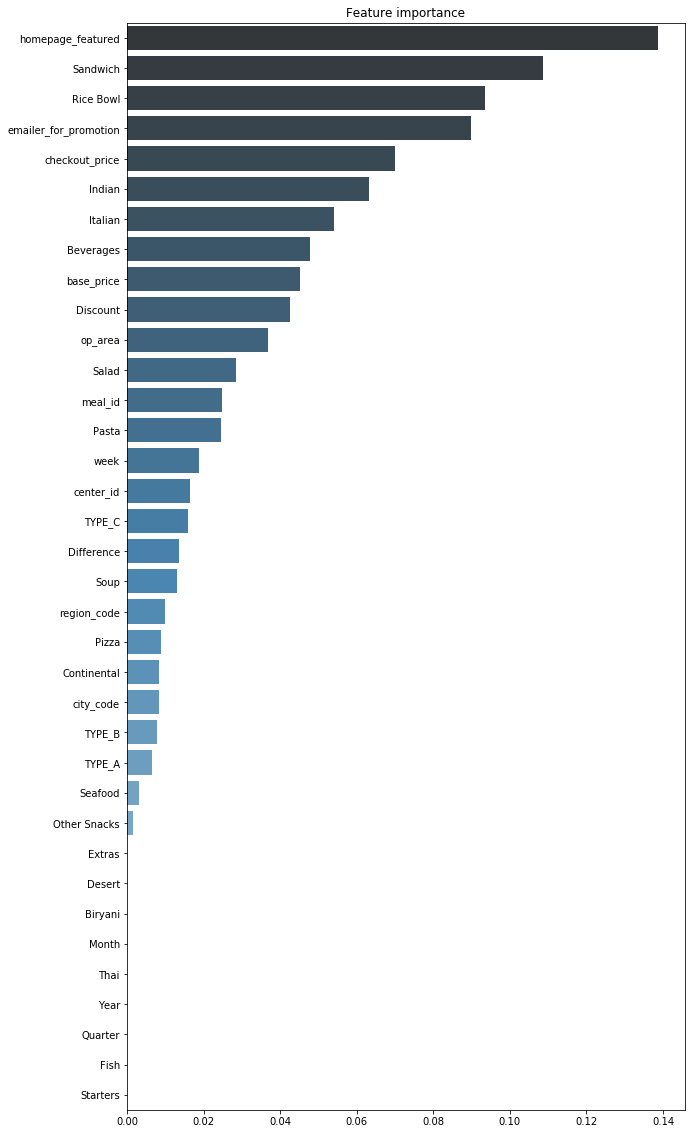

In [479]:
importances = model.feature_importances_
weights = pd.Series(importances, index=X.columns.values).sort_values(ascending=False)
plt.figure(figsize=(10,20))
plt.title("Feature importance")
ax = sns.barplot(y=weights.index, x=weights.values, palette="Blues_d", orient='h')

In [307]:
#Applying Linear Regression
from sklearn.linear_model import LinearRegression
from xgboost import XGBRegressor
model = XGBRegressor()
model.fit(X_train, y_train)
predy = model.predict(X_test)
predx = model.predict(X_train)

#Finding the r2 score and root mean squared error
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
#print("lr.coef_: {}".format(model.coef_))
#print("lr.intercept_: {}".format(model.intercept_))

train_rmse= np.sqrt(mean_squared_error(y_train, predx))
train_r2 = model.score(X_train, y_train)
test_rmse= np.sqrt(mean_squared_error(y_test, predy))
test_r2 = model.score(X_test, y_test)
perc = ((train_rmse-test_rmse)/train_rmse)*100

Train_adjusted_r2 = 1 - ((1 - train_r2)*((X_train.shape[0] - 1)/(X_train.shape[0]-(X_train.shape[1]+1))))
Test_adjusted_r2= 1 - ((1 - test_r2)*((X_test.shape[0] - 1)/(X_test.shape[0]-(X_test.shape[1]+1))))

print(f'Train (R-Squared): {train_r2:0.4f}; || Train Adj_R-Squared: {Train_adjusted_r2:0.4f}')
print(f'Test  (R-Squared): {test_r2:0.4f}; || Test Adj_R-Squared:  {Test_adjusted_r2:0.4f}')
#print("Train (R-Squared): {:.3f}".format(model.score(X_train, y_train)))
#print("Test set score: {:.7f}".format(model.score(X_test, y_test)))
#print('Test  (R-Squared): '+str(r2_score(y_test, predy)))
#print('Test  (RMSE): '+str(np.sqrt(mean_squared_error((y_test), (predy)))))
#print('Train (RMSE): '+str(np.sqrt(mean_squared_error((y_train), (predx)))))
print('RMSE on train:',train_rmse)
print('RMSE on test_:',test_rmse)
print(f'RMSE difference(test-train): {train_rmse-test_rmse}',{perc})
#print('Percentage difference: ', perc)
print("Mean Absolute Error(MAE): ",mean_absolute_error((y_test), (predy)))

# Evaluating Test Results
print('******* EVALUATING TEST RESULTS ***********')
pd.set_option('float_format', '{:f}'.format)
result = pd.DataFrame({'Actual_Value': (y_test), 'Predicted_Value': (predy)})
result.Predicted_Value = result.Predicted_Value.astype('int64')
result.Actual_Value = result.Actual_Value.astype('int64')
result['Difference'] = result.Actual_Value - result.Predicted_Value
result['Perc_of_error']= round(abs(((result.Actual_Value - result.Predicted_Value)/result.Actual_Value)*100))
print(result.head(6))

percenta= pd.DataFrame(result.Perc_of_error.value_counts())
percenta['Percentage_Accuracy']= (percenta.Perc_of_error/sum(percenta.Perc_of_error))*100
print(percenta.sort_index(axis = 0)[:10])
print(" %f percent of test data has error less than 12 percent: " % percenta.Percentage_Accuracy.sort_index(axis = 0)[:13].sum())

result['over_12'] = np.where((result['Perc_of_error'] >= 12), 1,0).astype('int64')
result.head()
result.loc[result['over_12'] == 1][:10]

# train data evaluation
pd.set_option('float_format', '{:f}'.format)
resulttrain = pd.DataFrame({'Actual_Value': (y_train), 'Predicted_Value': (predx)})
resulttrain.Predicted_Value = resulttrain.Predicted_Value.astype('int64')
resulttrain.Actual_Value = resulttrain.Actual_Value.astype('int64')
resulttrain['Difference'] = resulttrain.Actual_Value - resulttrain.Predicted_Value
resulttrain['Perc_of_error']= round(abs(((resulttrain.Actual_Value - resulttrain.Predicted_Value)/resulttrain.Actual_Value)*100))
#print(resulttrain.head(6))

percentage= pd.DataFrame(resulttrain.Perc_of_error.value_counts())
percentage['Percentage_Accuracy']= (percentage.Perc_of_error/sum(percentage.Perc_of_error))*100
# print(percentage.sort_index(axis = 0)[:10])
print(" %f percent of train data has error less than 12 percent: " % percentage.Percentage_Accuracy.sort_index(axis = 0)[:13].sum())

# resulttrain['over_12'] = np.where((resulttrain['Perc_of_error'] >= 12), 1,0).astype('int64')
# resulttrain.head()
# resulttrain.loc[resulttrain['over_12'] == 1][:10]

C:\Users\GD\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


Train (R-Squared): 0.6628; || Train Adj_R-Squared: 0.6628
Test  (R-Squared): 0.6605; || Test Adj_R-Squared:  0.6604
RMSE on train: 229.54388871583797
RMSE on test_: 231.54579270072637
RMSE difference(test-train): -2.0019039848884006 {-0.872122536604162}
Mean Absolute Error(MAE):  117.39805156271895
******* EVALUATING TEST RESULTS ***********
        Actual_Value  Predicted_Value  Difference  Perc_of_error
96369            325              470        -145      45.000000
22229            149              269        -120      81.000000
423531           161              136          25      16.000000
212936           393              578        -185      47.000000
384191           163              564        -401     246.000000
404016            81              129         -48      59.000000
           Perc_of_error  Percentage_Accuracy
0.000000             937             0.684116
1.000000            1574             1.149199
2.000000            1577             1.151389
3.000000         

In [306]:
#Applying Linear Regression
from sklearn.linear_model import LinearRegression
# from xgboost import XGBRegressor
model = LGBMRegressor()
model.fit(X_train, y_train)
predy = model.predict(X_test)
predx = model.predict(X_train)

#Finding the r2 score and root mean squared error
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
#print("lr.coef_: {}".format(model.coef_))
#print("lr.intercept_: {}".format(model.intercept_))

train_rmse= np.sqrt(mean_squared_error(y_train, predx))
train_r2 = model.score(X_train, y_train)
test_rmse= np.sqrt(mean_squared_error(y_test, predy))
test_r2 = model.score(X_test, y_test)
perc = ((train_rmse-test_rmse)/train_rmse)*100

Train_adjusted_r2 = 1 - ((1 - train_r2)*((X_train.shape[0] - 1)/(X_train.shape[0]-(X_train.shape[1]+1))))
Test_adjusted_r2= 1 - ((1 - test_r2)*((X_test.shape[0] - 1)/(X_test.shape[0]-(X_test.shape[1]+1))))

print(f'Train (R-Squared): {train_r2:0.4f}; || Train Adj_R-Squared: {Train_adjusted_r2:0.4f}')
print(f'Test  (R-Squared): {test_r2:0.4f}; || Test Adj_R-Squared:  {Test_adjusted_r2:0.4f}')
#print("Train (R-Squared): {:.3f}".format(model.score(X_train, y_train)))
#print("Test set score: {:.7f}".format(model.score(X_test, y_test)))
#print('Test  (R-Squared): '+str(r2_score(y_test, predy)))
#print('Test  (RMSE): '+str(np.sqrt(mean_squared_error((y_test), (predy)))))
#print('Train (RMSE): '+str(np.sqrt(mean_squared_error((y_train), (predx)))))
print('RMSE on train:',train_rmse)
print('RMSE on test_:',test_rmse)
print(f'RMSE difference(test-train): {train_rmse-test_rmse}',{perc})
#print('Percentage difference: ', perc)
print("Mean Absolute Error(MAE): ",mean_absolute_error((y_test), (predy)))

# Evaluating Test Results
print('******* EVALUATING TEST RESULTS ***********')
pd.set_option('float_format', '{:f}'.format)
result = pd.DataFrame({'Actual_Value': (y_test), 'Predicted_Value': (predy)})
result.Predicted_Value = result.Predicted_Value.astype('int64')
result.Actual_Value = result.Actual_Value.astype('int64')
result['Difference'] = result.Actual_Value - result.Predicted_Value
result['Perc_of_error']= round(abs(((result.Actual_Value - result.Predicted_Value)/result.Actual_Value)*100))
print(result.head(6))

percenta= pd.DataFrame(result.Perc_of_error.value_counts())
percenta['Percentage_Accuracy']= (percenta.Perc_of_error/sum(percenta.Perc_of_error))*100
print(percenta.sort_index(axis = 0)[:10])
print(" %f percent of test data has error less than 12 percent: " % percenta.Percentage_Accuracy.sort_index(axis = 0)[:13].sum())

result['over_12'] = np.where((result['Perc_of_error'] >= 12), 1,0).astype('int64')
result.head()
result.loc[result['over_12'] == 1][:10]

# train data evaluation
pd.set_option('float_format', '{:f}'.format)
resulttrain = pd.DataFrame({'Actual_Value': (y_train), 'Predicted_Value': (predx)})
resulttrain.Predicted_Value = resulttrain.Predicted_Value.astype('int64')
resulttrain.Actual_Value = resulttrain.Actual_Value.astype('int64')
resulttrain['Difference'] = resulttrain.Actual_Value - resulttrain.Predicted_Value
resulttrain['Perc_of_error']= round(abs(((resulttrain.Actual_Value - resulttrain.Predicted_Value)/resulttrain.Actual_Value)*100))
#print(resulttrain.head(6))

percentage= pd.DataFrame(resulttrain.Perc_of_error.value_counts())
percentage['Percentage_Accuracy']= (percentage.Perc_of_error/sum(percentage.Perc_of_error))*100
print(percentage.sort_index(axis = 0)[:10])
print(" %f percent of train data has error less than 12 percent: " % percentage.Percentage_Accuracy.sort_index(axis = 0)[:13].sum())

resulttrain['over_12'] = np.where((resulttrain['Perc_of_error'] >= 12), 1,0).astype('int64')
resulttrain.head()
resulttrain.loc[resulttrain['over_12'] == 1][:10]

Train (R-Squared): 0.8250; || Train Adj_R-Squared: 0.8250
Test  (R-Squared): 0.8157; || Test Adj_R-Squared:  0.8156
RMSE on train: 165.35138203860024
RMSE on test_: 170.61364644224153
RMSE difference(test-train): -5.262264403641296 {-3.1824737953583324}
Mean Absolute Error(MAE):  91.12134549643464
******* EVALUATING TEST RESULTS ***********
        Actual_Value  Predicted_Value  Difference  Perc_of_error
96369            325              413         -88      27.000000
22229            149              145           4       3.000000
423531           161              124          37      23.000000
212936           393              539        -146      37.000000
384191           163              414        -251     154.000000
404016            81              155         -74      91.000000
           Perc_of_error  Percentage_Accuracy
0.000000            1346             0.982733
1.000000            1824             1.331727
2.000000            2084             1.521557
3.000000          

,Actual_Value,Predicted_Value,Difference,Perc_of_error,over_12
410370,148,70,78,53.000000,1
372364,271,335,-64,24.000000,1
279363,82,101,-19,23.000000,1
379798,203,417,-214,105.000000,1
441579,148,116,32,22.000000,1
377723,135,101,34,25.000000,1
13508,770,533,237,31.000000,1
203482,94,79,15,16.000000,1
308629,81,131,-50,62.000000,1
236699,53,139,-86,162.000000,1


In [435]:
#Applying Linear Regression
from sklearn.linear_model import LinearRegression
# from xgboost import XGBRegressor
model = LGBMRegressor()
model.fit(X_train, y_train)
predy = model.predict(X_test)
predx = model.predict(X_train)

#Finding the r2 score and root mean squared error
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
#print("lr.coef_: {}".format(model.coef_))
#print("lr.intercept_: {}".format(model.intercept_))

train_rmse= np.sqrt(mean_squared_error(y_train, predx))
train_r2 = model.score(X_train, y_train)
test_rmse= np.sqrt(mean_squared_error(y_test, predy))
test_r2 = model.score(X_test, y_test)
perc = ((train_rmse-test_rmse)/train_rmse)*100

Train_adjusted_r2 = 1 - ((1 - train_r2)*((X_train.shape[0] - 1)/(X_train.shape[0]-(X_train.shape[1]+1))))
Test_adjusted_r2= 1 - ((1 - test_r2)*((X_test.shape[0] - 1)/(X_test.shape[0]-(X_test.shape[1]+1))))

print(f'Train (R-Squared): {train_r2:0.4f}; || Train Adj_R-Squared: {Train_adjusted_r2:0.4f}')
print(f'Test  (R-Squared): {test_r2:0.4f}; || Test Adj_R-Squared:  {Test_adjusted_r2:0.4f}')
#print("Train (R-Squared): {:.3f}".format(model.score(X_train, y_train)))
#print("Test set score: {:.7f}".format(model.score(X_test, y_test)))
#print('Test  (R-Squared): '+str(r2_score(y_test, predy)))
#print('Test  (RMSE): '+str(np.sqrt(mean_squared_error((y_test), (predy)))))
#print('Train (RMSE): '+str(np.sqrt(mean_squared_error((y_train), (predx)))))
print('RMSE on train:',train_rmse)
print('RMSE on test_:',test_rmse)
print(f'RMSE difference(test-train): {train_rmse-test_rmse}',{perc})
#print('Percentage difference: ', perc)
print("Mean Absolute Error(MAE): ",mean_absolute_error((y_test), (predy)))

# Evaluating Test Results
print('******* EVALUATING TEST RESULTS ***********')
pd.set_option('float_format', '{:f}'.format)
result = pd.DataFrame({'Actual_Value': (y_test), 'Predicted_Value': (predy)})
result.Predicted_Value = result.Predicted_Value.astype('int64')
result.Actual_Value = result.Actual_Value.astype('int64')
result['Difference'] = result.Actual_Value - result.Predicted_Value
result['Perc_of_error']= round(abs(((result.Actual_Value - result.Predicted_Value)/result.Actual_Value)*100))
print(result.head(6))

percenta= pd.DataFrame(result.Perc_of_error.value_counts())
percenta['Percentage_Accuracy']= (percenta.Perc_of_error/sum(percenta.Perc_of_error))*100
print(percenta.sort_index(axis = 0)[:10])
print(" %f percent of test data has error less than 12 percent: " % percenta.Percentage_Accuracy.sort_index(axis = 0)[:13].sum())

result['over_12'] = np.where((result['Perc_of_error'] >= 12), 1,0).astype('int64')
result.head()
result.loc[result['over_12'] == 1][:10]

# train data evaluation
pd.set_option('float_format', '{:f}'.format)
resulttrain = pd.DataFrame({'Actual_Value': (y_train), 'Predicted_Value': (predx)})
resulttrain.Predicted_Value = resulttrain.Predicted_Value.astype('int64')
resulttrain.Actual_Value = resulttrain.Actual_Value.astype('int64')
resulttrain['Difference'] = resulttrain.Actual_Value - resulttrain.Predicted_Value
resulttrain['Perc_of_error']= round(abs(((resulttrain.Actual_Value - resulttrain.Predicted_Value)/resulttrain.Actual_Value)*100))
#print(resulttrain.head(6))

percentage= pd.DataFrame(resulttrain.Perc_of_error.value_counts())
percentage['Percentage_Accuracy']= (percentage.Perc_of_error/sum(percentage.Perc_of_error))*100
print(percentage.sort_index(axis = 0)[:10])
print(" %f percent of train data has error less than 12 percent: " % percentage.Percentage_Accuracy.sort_index(axis = 0)[:13].sum())

resulttrain['over_12'] = np.where((resulttrain['Perc_of_error'] >= 12), 1,0).astype('int64')
resulttrain.head()
resulttrain.loc[resulttrain['over_12'] == 1][:10]

Train (R-Squared): 0.8700; || Train Adj_R-Squared: 0.8700
Test  (R-Squared): 0.8530; || Test Adj_R-Squared:  0.8529
RMSE on train: 142.30373375835637
RMSE on test_: 150.04376883982124
RMSE difference(test-train): -7.7400350814648675 {-5.439094869153675}
Mean Absolute Error(MAE):  80.69980972659535
******* EVALUATING TEST RESULTS ***********
        Actual_Value  Predicted_Value  Difference  Perc_of_error
218324           285              117         168      59.000000
95975             80               56          24      30.000000
336888           121              162         -41      34.000000
424494            69               44          25      36.000000
404891            68              144         -76     112.000000
133849            14               38         -24     171.000000
           Perc_of_error  Percentage_Accuracy
0.000000            1429             1.043340
1.000000            2113             1.542741
2.000000            2381             1.738413
3.000000          

,Actual_Value,Predicted_Value,Difference,Perc_of_error,over_12
240923,905,737,168,19.000000,1
270542,932,821,111,12.000000,1
369700,527,341,186,35.000000,1
379794,689,938,-249,36.000000,1
158010,69,36,33,48.000000,1
13508,770,639,131,17.000000,1
331018,204,179,25,12.000000,1
365639,148,232,-84,57.000000,1
331699,82,184,-102,124.000000,1
55277,26,53,-27,104.000000,1


In [472]:
from xgboost import XGBRegressor
model = XGBRegressor()
model.fit(X,Y)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bytree=1, gamma=0, importance_type='gain',
             learning_rate=0.1, max_delta_step=0, max_depth=3,
             min_child_weight=1, missing=None, n_estimators=100, n_jobs=1,
             nthread=None, objective='reg:linear', random_state=0, reg_alpha=0,
             reg_lambda=1, scale_pos_weight=1, seed=None, silent=True,
             subsample=1)

In [473]:
test.drop('id',axis=1,inplace=True)

In [474]:
y_predlr=model.predict(test)

In [462]:
sub.head()

,id,num_orders
0,1028232,125.406259
1,1127204,125.406259
2,1212707,125.406259
3,1082698,125.406259
4,1400926,125.406259


In [478]:
sub.head()

,id,num_orders
0,1028232,347.370422
1,1127204,347.370422
2,1212707,347.370422
3,1082698,347.370422
4,1400926,347.370422


In [475]:
sub.num_orders = y_predlr

In [476]:
sub.num_orders = abs(sub.num_orders)

In [477]:
sub.to_csv('lala5.csv', index=False)